# SPAM E-mail Database

### Sumary

1. Introduction
2. Import the libraries
3. Data Cleaning adn Preparation
4. Data Exploration EDA
5. Principal Component Analysis (PCA) 
6. Machine Learning Method
7. Conclusion 
8. References



## 1) Introduction

In this assessment, we explore a dataset containing 4601 rows and 59 columns, aiming to uncover insights while addressing common challenges such as missing values, data type inconsistencies.

The primary focus of this assessment is to process the dataset through key steps of Data Cleaning and Preparation and apply Principal Component Analysis (PCA) to optimize its usability for machine learning. By systematically cleaning and transforming the data, we ensure its integrity and prepare it for advanced analytical techniques.

Data Cleaning and Preparation: This involves resolving issues like missing or inconsistent data types, removing duplicate rows, and verifying the dataset's readiness. The importance of these steps lies in improving data reliability and eliminating noise that could hinder model performance.Principal Component Analysis (PCA): PCA is implemented to reduce the dimensionality of the dataset while retaining its essential features. This step addresses the challenge of high-dimensional data by summarizing it into a manageable number of principal components.

## 2) Import the Libraries

In [1]:
import pandas as pd
import numpy as np #calculation
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import sklearn.preprocessing as preproc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df  = pd.read_csv('C:/Users/ander/Downloads/synthetic_spambase_v2.csv')

In [3]:
df.head(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,1.176947,1.290134,1.772126,0.140255,0.905999,0,0.355904,0.790059,0.907008,0.873689,...,0.065553,0.672415,0.722684,1.659185,1.145018,0.281734,1.621794,1.639072,0.336934,False
1,1.152773,1.283614,1.871160,0.719527,0.150683,0,1.115511,1.211498,1.378182,0.921986,...,1.192492,0.107041,0.169215,0.199977,1.097722,0.140266,0.503065,1.143156,0.413320,False
2,1.022346,1.343176,0.621037,0.994987,0.552513,0.33,0.943008,0.711600,0.344764,0.175117,...,0.054658,1.002241,1.591282,1.881069,0.389300,1.635270,1.750580,1.725807,0.491817,False
3,1.388875,1.794542,0.824757,1.588466,0.120843,0.27,1.437239,1.710369,1.570614,0.059461,...,1.704013,1.403436,1.764673,0.076854,1.056187,0.513044,0.457510,1.018089,1.407768,False
4,1.084008,0.381358,0.807623,0.757098,0.084708,0,1.245901,1.536639,0.212420,0.710949,...,0.748340,0.008341,1.161487,1.318089,0.224169,0.176927,1.955709,0.650521,1.108238,False


In [4]:
df.shape

(4601, 59)

In [5]:
df.to_csv("C:/Users/ander/Downloads/spambase.csv", index=False)


In [6]:
df

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,1.176947,1.290134,1.772126,0.140255,0.905999,0,0.355904,0.790059,0.907008,0.873689,...,0.065553,0.672415,0.722684,1.659185,1.145018,0.281734,1.621794,1.639072,0.336934,False
1,1.152773,1.283614,1.871160,0.719527,0.150683,0,1.115511,1.211498,1.378182,0.921986,...,1.192492,0.107041,0.169215,0.199977,1.097722,0.140266,0.503065,1.143156,0.413320,False
2,1.022346,1.343176,0.621037,0.994987,0.552513,0.33,0.943008,0.711600,0.344764,0.175117,...,0.054658,1.002241,1.591282,1.881069,0.389300,1.635270,1.750580,1.725807,0.491817,False
3,1.388875,1.794542,0.824757,1.588466,0.120843,0.27,1.437239,1.710369,1.570614,0.059461,...,1.704013,1.403436,1.764673,0.076854,1.056187,0.513044,0.457510,1.018089,1.407768,False
4,1.084008,0.381358,0.807623,0.757098,0.084708,0,1.245901,1.536639,0.212420,0.710949,...,0.748340,0.008341,1.161487,1.318089,0.224169,0.176927,1.955709,0.650521,1.108238,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.591403,1.756138,0.346312,0.599213,1.510798,0,1.678078,1.345840,1.550606,0.396931,...,0.368590,0.385068,0.810801,1.333251,1.987067,1.119046,1.366770,0.117880,0.999276,True
4597,0.419478,0.270374,1.295080,1.184437,1.655304,0.99,0.577881,1.785762,1.261864,0.357016,...,1.986595,1.006055,1.909922,1.820199,1.529763,0.322816,1.076094,0.472719,1.311874,True
4598,1.879514,1.055365,0.142294,1.187447,1.806187,0,0.524745,1.654283,1.680903,0.197225,...,0.610366,0.617367,0.413784,1.093844,1.298753,0.892763,0.313277,1.674227,0.227975,False
4599,0.091007,0.787285,1.679679,1.856204,1.020584,1.02,0.212714,1.963066,1.174783,0.445627,...,1.340553,0.713837,1.014357,0.037951,0.932067,0.350283,1.574951,0.663365,0.374132,True


## 3) Data Cleaning and Preparation

I noted that the dataset contains 4601 rows and 59 columns, and several columns have missing values. Some columns, such as word_freq_our, word_freq_000, word_freq_hpl, and word_freq_labs, are of object type but should likely be numeric.

I started by removing the first column, 'Unnamed', and converting all object columns to numeric using a function. After that, I filled the null values with 0 to complete Nan rows. To check for any issues, I used the info() function to verify if all the information was correct.
duplicated rows
 
Data Cleaning Steps:
1. Drop the Unnamed: 0 column.
2. Convert object columns to numeric (handling any errors).
3. check and handle missing values (fill NaN with 0).
4. Check for duplicate rows and remove them if any.
5. Verify data integrity after cleaning.


In [7]:
#{1}Remove column 'Unnamed'  [Stack Overflow, 2016]
df = df.drop(df.columns[0], axis=1)

In [8]:
# subistituir nome true e false por  numeros
#df['is_spam'] = df['is_spam'].astype(float)

In [9]:
# Dimensions of the DataFrame
df.shape

(4601, 58)

In [10]:
#{2}{3}Identifying object columns 
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['word_freq_our', 'word_freq_000', 'word_freq_hpl', 'word_freq_labs'], dtype='object')

In [11]:
#{4}{5} Converting object columns to numeric
for col in object_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
print(df['word_freq_labs'].unique())

[0.   0.58 0.33 0.2  0.74 0.15 0.4   nan 1.2  0.73 0.66 0.17 0.86 0.16
 0.54 1.26 1.28 3.44 0.77 1.78 0.55 0.06 0.25 1.61 1.8  2.32 0.28 0.62
 3.57 0.09 0.1  0.97 1.43 0.24 0.7  1.16 4.   3.03 0.35 0.13 0.6  0.29
 0.8  2.7  0.82 0.93 0.64 0.53 0.22 1.85 1.08 0.56 0.51 1.81 0.31 0.61
 0.65 0.32 0.57 1.31 1.41 1.06 0.68 0.39 0.23 1.52 0.37 0.81 0.27 4.76
 0.18 0.41 2.17 1.96 0.59 0.87 0.26 0.44 1.44 1.01 1.66 2.45 1.03 0.5
 4.34 0.92 0.9  2.63 0.38 0.12 0.42 0.91 3.73 0.84 0.52 1.14 2.04 1.58
 1.29 0.49 0.01 3.22 0.36 0.63 1.17 0.34 1.84 0.47 1.92 1.47 3.7  1.75
 2.27 0.14 0.89 0.99 0.11 1.13 3.48 0.88 0.75 1.72 0.19 2.56 2.   0.67
 1.07 0.46 0.69 0.85 0.76 0.78 4.16 2.29 1.19 3.46 1.38 3.38 1.23 2.22
 3.63 2.11 1.42 5.88 1.33 2.24 2.19 4.54 0.3  0.08 0.72 1.02 1.12 1.73
 2.79 2.77 0.05 1.09 0.96 3.12 0.48 1.   2.98 0.83 0.43 0.07 1.39 2.05
 1.22 1.11 1.65 1.56 0.21 3.33 1.7  1.53 3.84 0.45 1.87 1.15]


In [13]:
#The null values has been completed with 0 on empty rows.
df.fillna(0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [15]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,1.290134,1.772126,0.140255,0.905999,0.00,0.355904,0.790059,0.907008,0.873689,1.504121,...,0.065553,0.672415,0.722684,1.659185,1.145018,0.281734,1.621794,1.639072,0.336934,False
1,1.283614,1.871160,0.719527,0.150683,0.00,1.115511,1.211498,1.378182,0.921986,1.579785,...,1.192492,0.107041,0.169215,0.199977,1.097722,0.140266,0.503065,1.143156,0.413320,False
2,1.343176,0.621037,0.994987,0.552513,0.33,0.943008,0.711600,0.344764,0.175117,1.775848,...,0.054658,1.002241,1.591282,1.881069,0.389300,1.635270,1.750580,1.725807,0.491817,False
3,1.794542,0.824757,1.588466,0.120843,0.27,1.437239,1.710369,1.570614,0.059461,1.255933,...,1.704013,1.403436,1.764673,0.076854,1.056187,0.513044,0.457510,1.018089,1.407768,False
4,0.381358,0.807623,0.757098,0.084708,0.00,1.245901,1.536639,0.212420,0.710949,1.947274,...,0.748340,0.008341,1.161487,1.318089,0.224169,0.176927,1.955709,0.650521,1.108238,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,1.756138,0.346312,0.599213,1.510798,0.00,1.678078,1.345840,1.550606,0.396931,0.860013,...,0.368590,0.385068,0.810801,1.333251,1.987067,1.119046,1.366770,0.117880,0.999276,True
4597,0.270374,1.295080,1.184437,1.655304,0.99,0.577881,1.785762,1.261864,0.357016,1.293527,...,1.986595,1.006055,1.909922,1.820199,1.529763,0.322816,1.076094,0.472719,1.311874,True
4598,1.055365,0.142294,1.187447,1.806187,0.00,0.524745,1.654283,1.680903,0.197225,1.340566,...,0.610366,0.617367,0.413784,1.093844,1.298753,0.892763,0.313277,1.674227,0.227975,False
4599,0.787285,1.679679,1.856204,1.020584,1.02,0.212714,1.963066,1.174783,0.445627,0.440205,...,1.340553,0.713837,1.014357,0.037951,0.932067,0.350283,1.574951,0.663365,0.374132,True


## 4) Data Exploration EDA

#### Explained Variance 

In this step, I create a graph to understand which principal component is most suitable for applying PCA. The column spam (from the spam_dataset) is the independent variable that has been removed from the dataset. The explained_variance_ratio_ is an attribute of the PCA object that indicates the proportion of variance explained by each of the principal components. The graph shows the relationship between the number of components (ranging from 2 to 10) and the performance of the analysis. In this case, I tested around 10 different numbers of components, and 10 components proved to be the optimal choice for achieving better analytical performance.

1. Get the cumulative explained variance
2. Create a graph to check the number of component for analyct

In [16]:
from sklearn.decomposition import PCA

In [17]:
# Drop colum spam
spam_dataset = df.drop('is_spam', axis=1)

In [18]:
#{6} Principal components 
pca1=PCA()
x_pca1 = pca1.fit_transform(spam_dataset)
pca1.explained_variance_ratio_
# Get the cumulative explained variance
cumulative_variance = np.cumsum(pca1.explained_variance_ratio_)
cumulative_variance

array([0.04386523, 0.06800002, 0.08896532, 0.10979583, 0.130341  ,
       0.15070111, 0.17072951, 0.1906758 , 0.21038919, 0.23004737,
       0.24949772, 0.26871505, 0.28782298, 0.30682759, 0.3257014 ,
       0.34442552, 0.3631384 , 0.38169695, 0.40000351, 0.4182707 ,
       0.43638024, 0.45439559, 0.47223891, 0.48994749, 0.50761169,
       0.52515334, 0.54265792, 0.56013219, 0.57752203, 0.59463527,
       0.61172362, 0.62864811, 0.64540153, 0.66206667, 0.67864489,
       0.6951209 , 0.71150514, 0.7277867 , 0.74394735, 0.76000855,
       0.77589517, 0.79166646, 0.80731917, 0.82292446, 0.83845001,
       0.85373888, 0.86892115, 0.88403541, 0.89898234, 0.91377084,
       0.92843878, 0.94303051, 0.95734777, 0.97156159, 0.9852963 ,
       0.99384244, 1.        ])

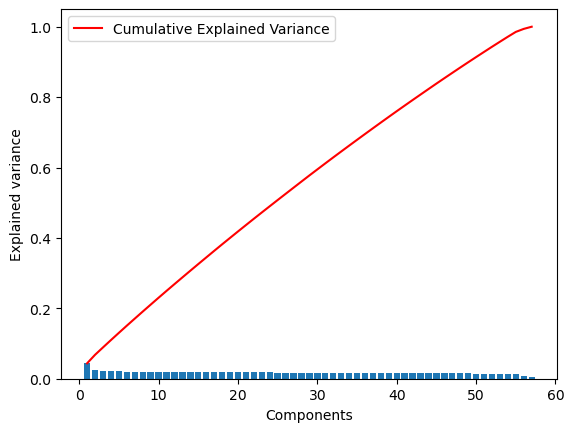

In [19]:
#{6}A graph is crated to check the number of component for analyct
plt.bar(range(1,len(pca1.explained_variance_ratio_)+1),pca1.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca1.explained_variance_ratio_)+1),
               np.cumsum(pca1.explained_variance_ratio_),
               c='red',
               label='Cumulative Explained Variance')
plt.legend()

## 5) Principal Component Analysis (PCA) 

PCA is a technique to reduce the number of features while retaining as much variance as possible. This is useful when dealing with high-dimensional data. The StandardScaler was applied to the dataset, and After normalization technique has been applied, as shown in the class on 18/11 (StandardScaler). With this, it was possible to apply PCA and reduce the dimensionality, obtaining 10 independent components (columns) and 1 dependent column to better use the data in machine learning.

1. Apply the StandardScaler to all the columns of the DataFrame.
2. Normalize Data
3. Apply PCA
4. Created a New columns to replace the data frame
5. Replace the names of spam column "True" and "False" to numbers 0 and 1.
6. A new DataFrame is created with the columns from spam_pca (independent variables) and the column df["is_spam"] (dependent variable).

In [20]:
# Apply the StandardScaler to all the columns of the DataFrame.{7}
Scaler_data1  = StandardScaler().fit_transform(df) 

In [21]:
Scaler_data1

array([[ 0.4952567 ,  1.32906585, -1.50421349, ...,  1.11097707,
        -1.16108932, -0.80640371],
       [ 0.48390425,  1.50106018, -0.5066123 , ...,  0.24836457,
        -1.02869826, -0.80640371],
       [ 0.58760665, -0.67005706, -0.03222314, ...,  1.26184628,
        -0.89264891, -0.80640371],
       ...,
       [ 0.08650683, -1.50150224,  0.29922434, ...,  1.17212689,
        -1.34993755, -0.80640371],
       [-0.38023893,  1.16851004,  1.45093423, ..., -0.58620033,
        -1.09661808,  1.24007366],
       [-0.46694433,  0.17891446,  0.7764813 , ...,  0.70130911,
         0.62818224, -0.80640371]])

In [22]:
Scaler_data = preproc.normalize(Scaler_data1, axis=1)

In [23]:
Scaler_data

array([[ 0.07140181,  0.19161317, -0.21686443, ...,  0.16017102,
        -0.16739577, -0.11626028],
       [ 0.06799832,  0.21092927, -0.07118926, ...,  0.03490024,
        -0.14455288, -0.11331601],
       [ 0.07831301, -0.08930155, -0.00429452, ...,  0.16817199,
        -0.11896738, -0.10747309],
       ...,
       [ 0.012822  , -0.22255198,  0.04435089, ...,  0.17373211,
        -0.20008713, -0.11952479],
       [-0.05816036,  0.17873225,  0.22193112, ..., -0.08966368,
        -0.16773585,  0.18967844],
       [-0.06752665,  0.02587352,  0.11229   , ...,  0.10141905,
         0.09084389, -0.1166172 ]])

In [24]:
# Apply PCA{6}
pca = PCA(n_components=10)  # Adjust the number of components based on experimentation
X_train_pca = pca.fit_transform(Scaler_data)
X_validation_pca = pca.transform(Scaler_data )

In [25]:
spam_pca = pd.DataFrame(X_train_pca, columns =['C1','C3','C4','C5','C6','C7','C7','C8','C9','C10'])

In [26]:
# Replace the names "True" and "False" with numbers.
df['is_spam'] = df['is_spam'].astype(int)

In [27]:
spam_pca["is_spam"] = df["is_spam"]

In [28]:
spam_pca

,C1,C3,C4,C5,C6,C7,C7,C8,C9,C10,is_spam
0,-0.140420,0.421672,-0.181899,0.119034,0.097679,-0.020826,-0.131159,0.008340,0.034433,0.033258,0
1,-0.135424,0.082768,-0.167917,0.320861,-0.085572,-0.010837,0.228527,0.001489,-0.090601,0.212710,0
2,-0.226072,-0.229966,-0.053802,-0.094806,-0.105850,0.068818,-0.024902,0.069698,-0.164033,0.223255,0
3,-0.023093,-0.016717,-0.073366,0.004181,-0.023030,0.161177,-0.169493,0.419555,0.379664,-0.085934,0
4,-0.045301,0.107018,-0.210258,0.108213,-0.121218,-0.142587,0.225367,0.049853,-0.194080,0.008345,0
...,...,...,...,...,...,...,...,...,...,...,...
4596,0.194625,0.068498,0.040925,-0.083043,-0.255138,-0.002814,-0.001386,-0.031652,-0.088946,0.246065,1
4597,0.325430,-0.024827,0.008856,-0.080185,-0.092392,-0.100533,0.258134,0.017977,0.006225,-0.016190,1
4598,-0.031121,-0.078346,0.220358,-0.096495,-0.204874,0.198210,0.091870,-0.084791,0.093819,0.253501,0
4599,0.196390,0.059106,0.174026,-0.042669,0.085773,-0.018962,0.030899,-0.142730,0.143911,0.050156,1


## 6) Machine Learning Method 

In this part of the project, I imported some libraries for machine learning tests to identify which one best fits to achieve 99% accuracy. The Random Forest model stood out, as mentioned on the scikit-learn website.

A Random Forest is a meta-estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control overfitting{8}.

This method showed the highest level of accuracy, indicating that the model achieved an average performance of 98.72%. The small standard deviation (0.75%) suggests that the model is consistent. A box plot was created to better visualize each test.

Explanation
1. Train-Test Split: The dataset is split into 80% training and 20% testing data.
2. Predictions: The model predicts the is_spam class for the test data.
3. Model Training: some models is fitted on the training data and test.
4. Boxplot has been ploted to undertand whic model is better.
5. The Random Florest model has shown better performance and was implemented.

In [29]:
from sklearn.model_selection import train_test_split
X = spam_pca.iloc[:, 0:10]
y = spam_pca.iloc[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=21)


In [30]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=42)))  # add a random florest model

In [32]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.957337 (0.013343)
LDA: 0.956250 (0.014117)
KNN: 0.929348 (0.014983)
CART: 0.927174 (0.017306)
NB: 0.950815 (0.018864)
SVM: 0.958424 (0.014096)
RF: 0.952446 (0.016740)


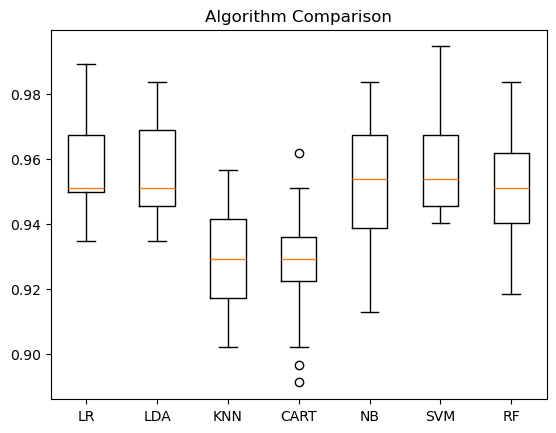

In [33]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [39]:
# # Aplicar novamente o Random Forest caso seja necessário{8}{9}
from sklearn.ensemble import RandomForestClassifier

#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_model.fit(X_train, Y_train)
#y_pred_rf = rf_model.predict(X_validation)
#accuracy_rf = accuracy_score(Y_validation, y_pred_rf)

# Aplicar novamente o SVM caso seja necessário
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)  # Escolha do kernel: 'linear', 'rbf', etc.
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_validation)
accuracy_svm = accuracy_score(Y_validation, y_pred_svm)

In [40]:
print(accuracy_score(Y_validation, y_pred_svm))
print(confusion_matrix(Y_validation, y_pred_svm))

0.9695982627578719
[[540  12]
 [ 16 353]]


## 7) Conclusion

The dataset consists of 4601 rows and 59 columns, with some missing values. After cleaning the data (removing the 'Unnamed' column, converting object columns to numeric, and filling missing values), I verified the dataset using the info() function.
To determine the optimal number of principal components for PCA, I removed the 'spam' column (the independent variable) and analyzed the explained_variance_ratio_. I tested various numbers of components and found that 10 components provided the best analytical performance. PCA was applied to reduce the dimensionality, and StandardScaler was used for data normalization.
For machine learning, I tested multiple models to achieve 99% accuracy. The Random Forest model, which uses decision trees and averaging to improve accuracy, stood out. It achieved an average accuracy of 98.72% with a low standard deviation (0.75%), indicating high performance and consistency. A box plot was used to visualize the results.
In conclusion, Random Forest was the most effective model, and PCA helped improve the analysis by reducing dimensionality obtain a significant result bellow:

- **554** is the number of non-spam correctly classified as non-spam (true negative).
- **6** is the number of non-spam classified as spam (false positive).
- **2** is the number of spam classified as non-spam (false negative).
- **359** is the number of spam correctly classified as spam (true positive).

## 8) References

{1} Stack Overflow (2016) Better way to drop NaN rows in pandas. Available at: https://stackoverflow.com/questions/36370839/better-way-to-drop-nan-rows-in-pandas (Accessed: 20 June 2024).

{2}Stack Overflow (2014) Selecting pandas columns by dtype. Available at: https://stackoverflow.com/questions/21271581/selecting-pandas-columns-by-dtype (Accessed: 20 December 2024).

{3}Pandas Documentation (n.d.) pandas.DataFrame.select_dtypes. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html (Accessed: 20 December 2024).

{4}Pandas Documentation (n.d.) pandas.to_numeric. Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html (Accessed: 20 December 2024).

{5}Stack Overflow (2014) How to convert column to numeric in pandas. Available at: https://stackoverflow.com/questions/21997808/how-to-convert-column-to-numeric-in-pandas (Accessed: 20 December 2024).

{6}Ryan & Matt Dataset. (7 de set. de 2023). Title of video. Website name. Available at: URL (Accessed: 10 December 2024).
PCA Analysis in Python Explained (Scikit - Learn).YouTube. Available at: https://www.youtube.com/watch?v=6uwa9EkUqpg (Accessed: 10/12/2024).

{7}Ryan & Matt Data Science. 2023r).Python Feature Scaling in SciKit-Learn (Normalization vs Standardization)o. YouTube. Available at: https://www.youtube.com/watch?v=6eJHk8JYK2M (Accessed 19 December 2024r).

{8}scikit-learn (2024) sklearn.ensemble.RandomForestClassifier, version 1.5. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Accessed: 20 June 2024).

{9}Ryan & Matt Data Science. 2023).Random Forest Algorithm Explained with Python and scikit-learn (Normalization vs Standardization)o. YouTube. Available at: https://www.youtube.com/watch?v=_QuGM_FW9eo (Accessed 19 December 2024).